In [122]:
# Import the necessary libraries
import numpy as np
import pandas as pd
from pandas import json_normalize
import matplotlib.pyplot as plt
import seaborn as sns
import requests
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
import kaggle
import unzip

In [123]:
# Download dataset from Kaggle using the Kaggle API

kaggle.api.authenticate()
kaggle.api.dataset_download_files('oles04/bundesliga-soccer-player', path= '.', unzip=True)

Dataset URL: https://www.kaggle.com/datasets/oles04/bundesliga-soccer-player


In [124]:
# the csv file
df = pd.read_csv('/Users/luisalva/Desktop/python/bundesliga_player.csv')
df.head()

,Unnamed: 0,name,full_name,age,height,nationality,place_of_birth,price,max_price,position,shirt_nr,foot,club,contract_expires,joined_club,player_agent,outfitter
0,0,Manuel Neuer,Manuel Peter Neuer,37,1.93,Germany,Gelsenkirchen,7.0,45.0,Goalkeeper,1,right,Bayern Munich,2024-06-30,2011-07-01,PRO Profil GmbH,adidas
1,1,Yann Sommer,NaN,34,1.83,Switzerland,Morges,5.0,13.0,Goalkeeper,27,right,Bayern Munich,2025-06-30,2023-01-19,Relatives,Puma
2,2,Sven Ulreich,NaN,34,1.92,Germany,Schorndorf,0.9,6.0,Goalkeeper,26,right,Bayern Munich,2024-06-30,2021-07-01,BMS Sportconsulting ...,adidas
3,3,Johannes Schenk,NaN,20,1.91,Germany,Schweinfurt,0.3,0.3,Goalkeeper,35,NaN,Bayern Munich,2024-06-30,2022-07-01,11WINS,NaN
4,4,Matthijs de Ligt,NaN,23,1.89,Netherlands,Leiderdorp,75.0,75.0,Defender - Centre-Back,4,right,Bayern Munich,2027-06-30,2022-07-19,Rafaela Pimenta,adidas


In [125]:
# Check for duplicates in the dataset
df.duplicated().sum()

0

In [172]:
# Check data types
df.dtypes

Unnamed: 0                   int64
name                        object
age                          int64
height                     float64
nationality                 object
place_of_birth              object
price                      float64
max_price                  float64
position                    object
shirt_nr                     int64
foot                        object
club                        object
contract_expires    datetime64[ns]
joined_club         datetime64[ns]
player_agent                object
outfitter                   object
dtype: object

In [ ]:
# Convert columns to datetime objects
df['joined_club'] = pd.to_datetime(df['joined_club'])
df['contract_expires'] = pd.to_datetime(df['contract_expires'])
df.dtypes

In [126]:
# Check for duplicates in the name column
df['name'].duplicated().sum()

0

In [127]:
# Check for null values
df.isna().sum()

Unnamed: 0            0
name                  0
full_name           286
age                   0
height                0
nationality           0
place_of_birth        5
price                 5
max_price             5
position              0
shirt_nr              0
foot                  9
club                  0
contract_expires     34
joined_club           0
player_agent         27
outfitter           322
dtype: int64

In [128]:
# Drp full_name column since it has too many NULL values and name column is the same
df.drop('full_name', axis=1, inplace=True)
df.head()

,Unnamed: 0,name,age,height,nationality,place_of_birth,price,max_price,position,shirt_nr,foot,club,contract_expires,joined_club,player_agent,outfitter
0,0,Manuel Neuer,37,1.93,Germany,Gelsenkirchen,7.0,45.0,Goalkeeper,1,right,Bayern Munich,2024-06-30,2011-07-01,PRO Profil GmbH,adidas
1,1,Yann Sommer,34,1.83,Switzerland,Morges,5.0,13.0,Goalkeeper,27,right,Bayern Munich,2025-06-30,2023-01-19,Relatives,Puma
2,2,Sven Ulreich,34,1.92,Germany,Schorndorf,0.9,6.0,Goalkeeper,26,right,Bayern Munich,2024-06-30,2021-07-01,BMS Sportconsulting ...,adidas
3,3,Johannes Schenk,20,1.91,Germany,Schweinfurt,0.3,0.3,Goalkeeper,35,NaN,Bayern Munich,2024-06-30,2022-07-01,11WINS,NaN
4,4,Matthijs de Ligt,23,1.89,Netherlands,Leiderdorp,75.0,75.0,Defender - Centre-Back,4,right,Bayern Munich,2027-06-30,2022-07-19,Rafaela Pimenta,adidas


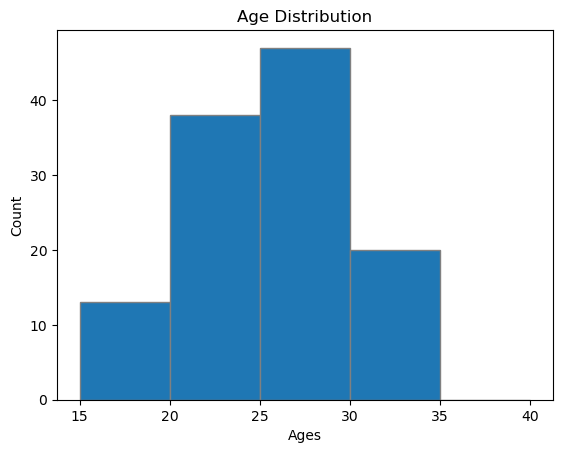

In [129]:
# What is the age distribution of left-footed players? 
age_distribution = df[df['foot'] == 'left']
plt.hist(age_distribution['age'], bins= [15, 20, 25, 30, 35, 40], edgecolor='gray')

plt.title('Age Distribution')
plt.xlabel("Ages")
plt.ylabel("Count")

plt.show()


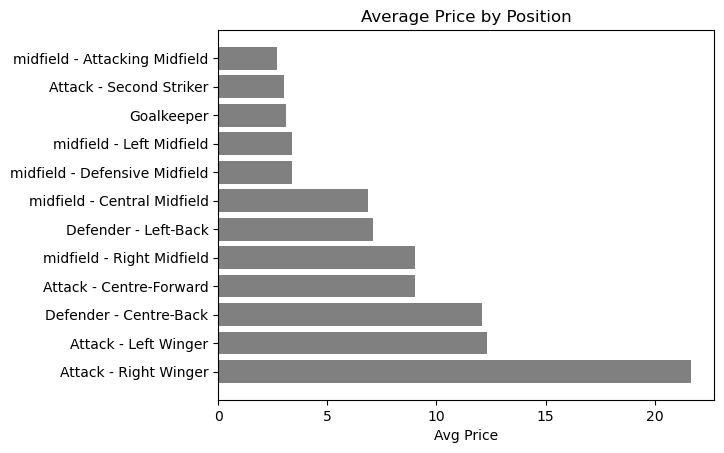

In [133]:
# How does the market price compare for left-footed players across different positions?
price_market = df[df['foot'] == 'left'].groupby('position')['price'].mean().sort_values(ascending=False).reset_index()
plt.barh(price_market['position'], price_market['price'], color='gray')

plt.title('Average Price by Position')
plt.xlabel('Avg Price')

plt.show()


Text(0, 0.5, 'Price')

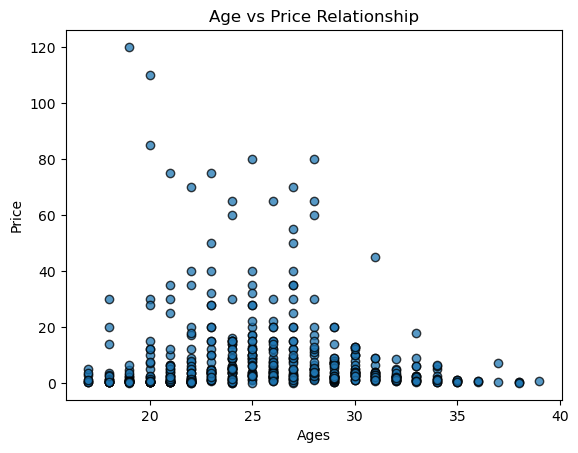

In [131]:
# What is the relationship between age and price for left-footed players? 
plt.scatter(df['age'], df['price'], edgecolor='black', linewidth=1, alpha=.75)

plt.title('Age vs Price Relationship')
plt.xlabel("Ages")
plt.ylabel("Price")

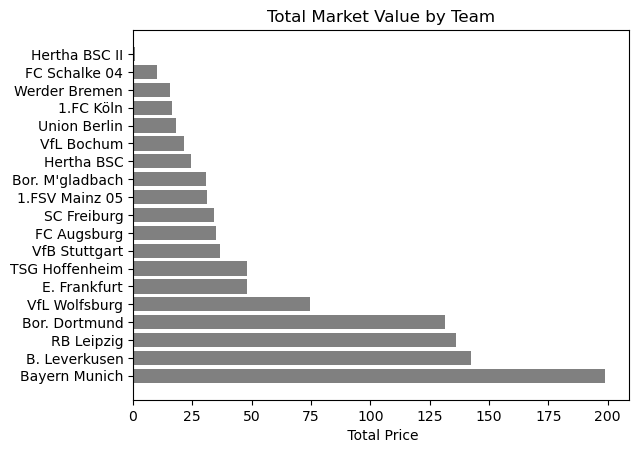

In [137]:
# Which club has the highest total market value from left-footed players?
price_per_club = df[df['foot'] == 'left'].groupby('club')['price'].sum().sort_values(ascending=False).reset_index()

plt.barh(price_per_club['club'], price_per_club['price'], color='gray')
plt.title('Total Market Value by Team')
plt.xlabel(' Total Price')

plt.show()


In [164]:
# Do left-footed players tend to have higher or lower maximum prices than right-footed players?
max_price_avg = [round(df.loc[df['foot'] == 'left', 'max_price'].mean(), 2), round(df.loc[df['foot'] == 'right', 'max_price'].mean(), 2)]
max_price_avg



[14.16, 14.5]

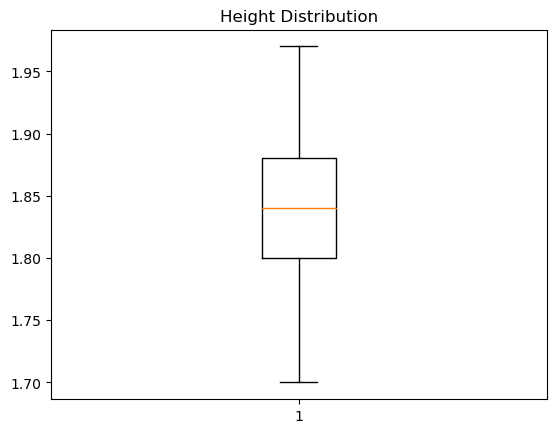

In [168]:
# What is the height distribution of left-footed players?
height_distribution = df[df['foot'] == 'left']
plt.boxplot(height_distribution['height'])

plt.title('Height Distribution')

plt.show()

In [ ]:
# What is the average contract length for left-footed players?
Analysis: Calculate the average years remaining on contract for left-footed players based on contract_expires and joined_club.
Code Tip: Subtract the year of contract_expires from the current year to calculate contract length, then find the average.

In [ ]:
df['joined_club'] = pd.to_datetime(df['joined_club'])
df['contract_expires'] = pd.to_datetime(df['contract_expires'])
df.dtypes

df['month_diff'] = (df['end_date'].dt.to_period('M').astype(int) - df['start_date'].dt.to_period('M').astype(int))

Unnamed: 0                   int64
name                        object
age                          int64
height                     float64
nationality                 object
place_of_birth              object
price                      float64
max_price                  float64
position                    object
shirt_nr                     int64
foot                        object
club                        object
contract_expires    datetime64[ns]
joined_club         datetime64[ns]
player_agent                object
outfitter                   object
dtype: object